In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_test=pd.read_csv(r"C:\Users\Manav\Downloads\Test.csv")
df_train=pd.read_csv(r"C:\Users\Manav\Downloads\Train.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

##### Dealing with Missing Values

In [8]:
df_train.Item_Weight.fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test.Item_Weight.fillna(df_train['Item_Weight'].mean(),inplace=True)

In [9]:
df_train.Outlet_Size.fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test.Outlet_Size.fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [10]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

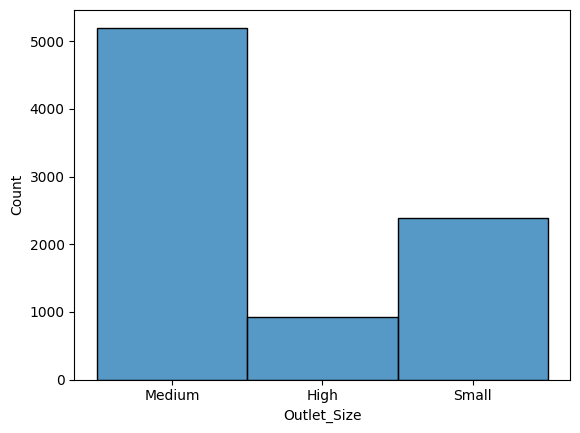

In [11]:
plot_1=sns.histplot(df_train.Outlet_Size)

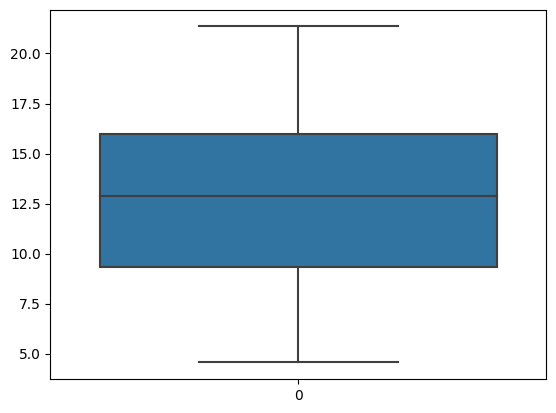

In [12]:
plot_2=sns.boxplot(df_train.Item_Weight)

C:\Users\Manav\AppData\Local\Temp\ipykernel_24800\1184061192.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


<AxesSubplot: >

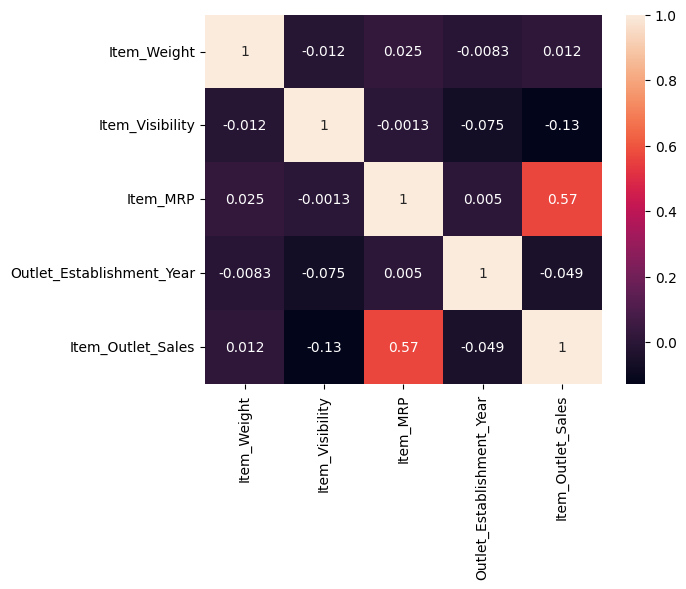

In [13]:
#correlation between numeric features and target feature
df_train.corr(method='pearson',numeric_only=True)
sns.heatmap(df_train.corr(),annot=True)
#Item MRP has strong positive correlation with target feature

In [14]:
#dropping unecessary columns
df_train.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [15]:
df_train.shape

(8523, 10)

### Feature Engineering

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])

In [18]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


#### Training and Testing Data Split

In [19]:
Y=df_train['Item_Outlet_Sales']
X=df_train.drop("Item_Outlet_Sales",axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.2)

In [21]:
X.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [25]:
Y_pred=lr.predict(X_test_std)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print(r2_score(Y_test,Y_pred))

0.5041875762809336


### Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000)
rf.fit(X_train_std,Y_train)
Y_rf_pred=rf.predict(X_test_std)

In [29]:
print(r2_score(Y_test,Y_rf_pred))

0.5485184927425987


### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model= RandomForestRegressor()
n_estimators=[10,100,1000]
max_depth=range(1,31)
min_samples_lead=np.linspace(.1,1.0)
max_features=['auto','sqrt','log2']
min_samples_split=np.linspace(0.1,1.0,10)

grid=dict(n_estimators=n_estimators)

grid_search_forest=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_forest.fit(X_train_std,Y_train)
print(f"Best: {grid_search_forest.best_score_: .3f} using {grid_search_forest.best_params_}")
means=grid_search_forest.cv_results_['mean_test_score']
stds=grid_search_forest.cv_results_['std_test_score']
params=grid_search_forest.cv_results_['params']

for mean , stdev,param in zip(means,stds,params):
    print(f"{means} ({stdev}) with : {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best:  0.549 using {'n_estimators': 1000}
[0.51766138 0.54774639 0.54930682] (0.009968559546152) with : {'n_estimators': 10}
[0.51766138 0.54774639 0.54930682] (0.004639431519879222) with : {'n_estimators': 100}
[0.51766138 0.54774639 0.54930682] (0.0060757005341838255) with : {'n_estimators': 1000}


In [31]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [32]:
r2_score(Y_test,Y_pred_rf_grid)

0.5497264086567595

### XGBoost Regression

In [33]:
from xgboost import XGBRegressor
from sklearn import metrics

In [34]:
regressor=XGBRegressor()
regressor.fit(X_train,Y_train)
Y_pred_XGB=regressor.predict(X_train)
metrics.r2_score(Y_train,Y_pred_XGB)
Y_pred_XGB_test=regressor.predict(X_test)
metrics.r2_score(Y_test,Y_pred_XGB_test)

0.5313038759438669

### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

In [36]:
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [37]:
Y_pred_Dr=dr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score

In [39]:
from sklearn import metrics

In [40]:
value=r2_score(Y_test,Y_pred_Dr)
value

0.15631358260449657

### Cross Validation 

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [42]:
scores_lr=cross_val_score(lr,X,Y,cv=10)

In [43]:
scores_lr.mean()

0.5052960849422461

In [44]:
scores_rf=cross_val_score(rf,X,Y,cv=10).mean()

In [45]:
scores_rf

0.5559014154467347

In [46]:
scores_XGB=cross_val_score(regressor,X,Y,cv=10)

In [47]:
scores_XGB.mean()

0.5258716053518832

In [48]:
scores_dr=cross_val_score(dr,X,Y,cv=10)

In [49]:
scores_dr.mean()

0.17162978534893747